In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from analysis.utils import module_reload
module_reload('analysis')
from analysis.import_data import import_true_reco, root_to_numpy
from analysis.calc import get_kinematics

/nfs/dust/ilc/user/bliewert/miniconda3/envs/py37/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
testing = True

if testing:
    src_dir = "/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/"
    src_name = "rv02-02-03.sv02-02-03.mILD_l5_o1_v02_nobg.E500-TDR_ws.I403001.Pe2e2hh.eL.pR.n000.d_dstm_15806_0"
    tree_name = "dataTree"
    file_name = "compare_reco.root"

    df = root_to_numpy(osp.join(src_dir, src_name, "root/prod", file_name), tree_name, null_on_not_found=True)
    mask = df['error_code'] == 0
    df = df[mask]

<AxesSubplot:xlabel='error_code', ylabel='count'>

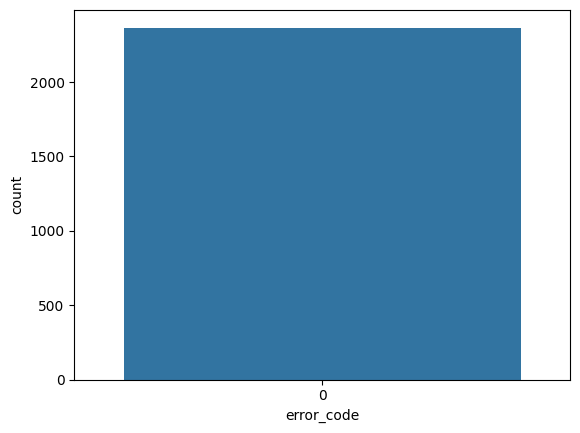

In [3]:
sns.countplot(pd.DataFrame(df), x='error_code')

In [12]:
module_reload('analysis')
from analysis.import_data import import_true_reco
df = import_true_reco(recalc=True)

Current length: 99238: 100%|██████████| 63/63 [00:11<00:00,  5.47it/s]


Saved cache file to /nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/cache/comparison_reco_zhh_zzh.npy


<AxesSubplot:xlabel='error_code', ylabel='count'>

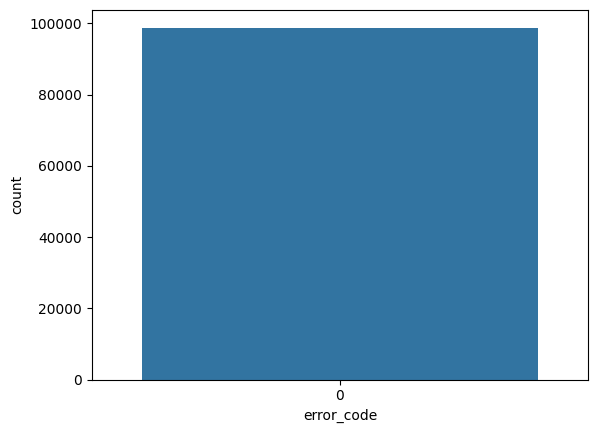

In [13]:
sns.countplot(df, x='error_code')

<AxesSubplot:xlabel='is_zhh', ylabel='count'>

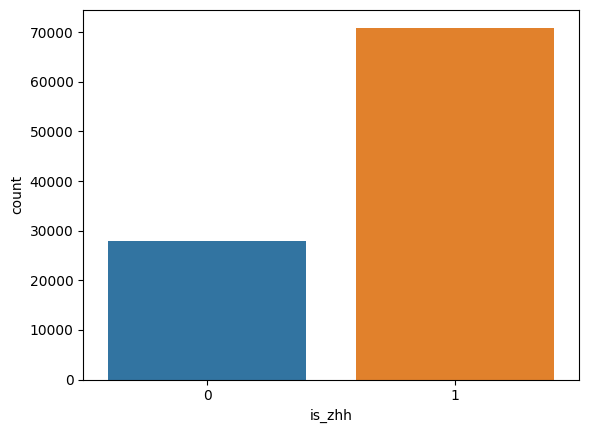

In [14]:
sns.countplot(df, x='is_zhh')

In [15]:
event_idx = 7336
np.where(df["event"] == event_idx)[0]

array([16159])

In [1]:
from analysis.mem_ana import constants

In [10]:
sigma_zhh = constants["sigma_zhh"]
sigma_zzh = constants["sigma_zzh"]
z_bb_branching = constants["B_Z_bb"]
h_bb_branching = constants["B_H_bb"]
pb_to_1oGeV2 = constants['pb_to_1oGeV2']

sigma_sig = sigma_zhh*h_bb_branching*h_bb_branching
sigma_bkg = sigma_zzh*h_bb_branching*z_bb_branching

In [11]:
print('ZHH', sigma_sig)
print('ZZH', sigma_bkg)
print('sig_to_bkg', sigma_sig/sigma_bkg)

ZHH 0.003615050573799999
ZZH 0.00707926056768
sig_to_bkg 0.5106536959953596
